<a href="https://colab.research.google.com/github/MohamedAmrElBadaly/Mo-Elbadaly/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [59]:
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

In [60]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [61]:
df.isna().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [63]:
df.shape

(299, 13)

In [64]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [65]:
df.duplicated().sum()

np.int64(0)

In [66]:
from collections import Counter

def detect_outliers(df,features):
    outlier_indices = []

    for c in features:

        Q1 = np.percentile(df[c],25)

        Q3 = np.percentile(df[c],75)

        IQR = Q3 - Q1

        outlier_step = IQR * 1.5

        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index

        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)

    return multiple_outliers

df.loc[detect_outliers(df,["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"])]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
38,60.0,0,2656,1,30,0,305000.00,2.3,137,1,0,30,0
52,60.0,0,3964,1,62,0,263358.03,6.8,146,0,0,43,1
163,50.0,1,2334,1,35,0,75000.00,0.9,142,0,0,126,1
200,63.0,1,1767,0,45,0,73000.00,0.7,137,1,0,186,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
217,54.0,1,427,0,70,1,151000.00,9.0,137,0,0,196,1
117,85.0,1,102,0,60,0,507000.00,3.2,138,0,0,94,0
167,59.0,0,66,1,20,0,70000.00,2.4,134,1,0,135,1
281,70.0,0,582,0,40,0,51000.00,2.7,136,1,1,250,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [67]:
df = df.drop(detect_outliers(df,["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]),axis = 0).reset_index(drop=True)

In [68]:
from scipy.stats import skew

In [69]:
skewed_feats = df.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame(skewed_feats, columns = ["skewed"])
skewness

,skewed
creatinine_phosphokinase,4.827396
serum_creatinine,4.605615
platelets,1.429547
DEATH_EVENT,0.797132
smoking,0.729243
high_blood_pressure,0.583959
ejection_fraction,0.546146
age,0.413840
diabetes,0.358569
anaemia,0.286636


In [70]:
x = df.drop('DEATH_EVENT',axis=1)
y = df['DEATH_EVENT']

In [71]:
from scipy.stats import skew

In [72]:
skewed_feats = df.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness_new = pd.DataFrame(skewed_feats, columns = ["skewed"])
skewness_new

,skewed
creatinine_phosphokinase,4.827396
serum_creatinine,4.605615
platelets,1.429547
DEATH_EVENT,0.797132
smoking,0.729243
high_blood_pressure,0.583959
ejection_fraction,0.546146
age,0.413840
diabetes,0.358569
anaemia,0.286636


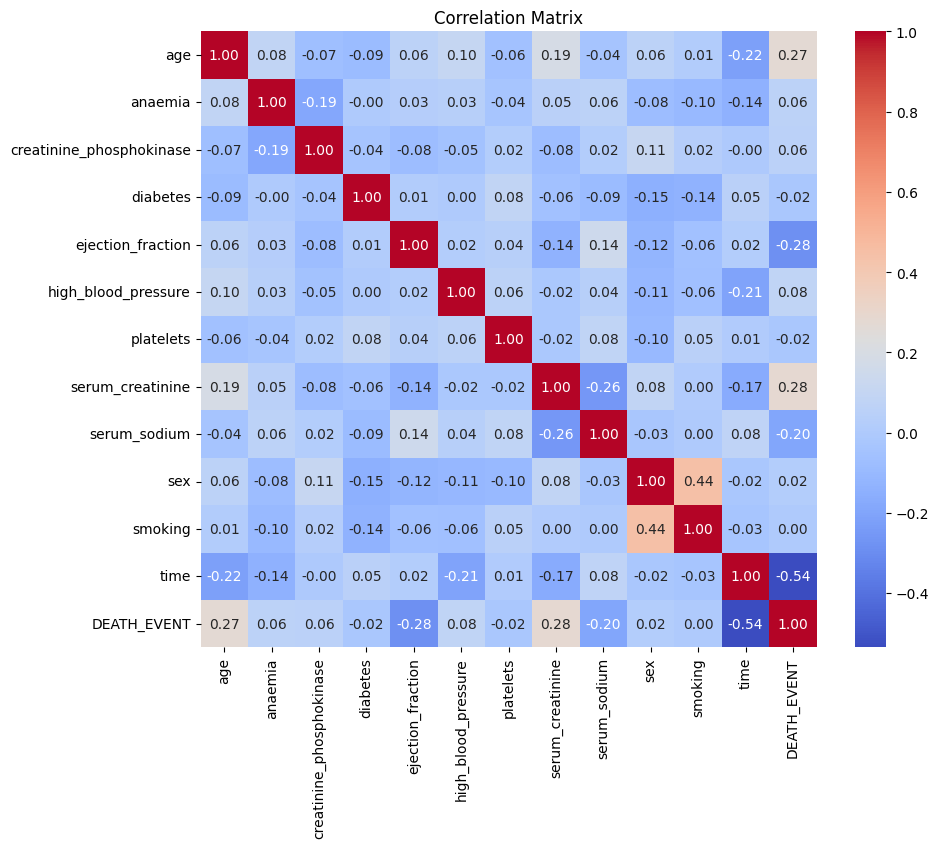

In [73]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

In [74]:
df.dtypes

,0
age,float64
anaemia,int64
creatinine_phosphokinase,int64
diabetes,int64
ejection_fraction,int64
high_blood_pressure,int64
platelets,float64
serum_creatinine,float64
serum_sodium,int64
sex,int64


In [75]:
y.value_counts()

,count
DEATH_EVENT,
0,198
1,91


In [76]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import StratifiedKFold, cross_val_score
from xgboost import XGBClassifier

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2

In [81]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)

In [83]:
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(x_smote, y_smote)
X_test_selected = selector.transform(X_test_scaled)

In [84]:
y_smote.value_counts()

,count
DEATH_EVENT,
0,156
1,156


In [88]:
xgb = XGBClassifier(random_state=42, eval_metric='logloss')

In [89]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [90]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [91]:
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

In [92]:
grid_search.fit(X_train_selected, y_smote)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [93]:
best_model = grid_search.best_estimator_

In [94]:
from sklearn.metrics import classification_report

In [95]:
y_pred_test = best_model.predict(X_test_selected)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.81      0.81      0.81        16

    accuracy                           0.90        58
   macro avg       0.87      0.87      0.87        58
weighted avg       0.90      0.90      0.90        58



from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))


In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        42
           1       0.62      0.50      0.55        16

    accuracy                           0.78        58
   macro avg       0.72      0.69      0.70        58
weighted avg       0.77      0.78      0.77        58



In [98]:
from sklearn.svm import SVC

In [119]:
svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        42
           1       0.69      0.56      0.62        16

    accuracy                           0.81        58
   macro avg       0.77      0.73      0.75        58
weighted avg       0.80      0.81      0.80        58



In [150]:
from sklearn.linear_model import LogisticRegression

In [117]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,  y_train)

y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.95      0.89        42
           1       0.80      0.50      0.62        16

    accuracy                           0.83        58
   macro avg       0.82      0.73      0.75        58
weighted avg       0.82      0.83      0.81        58



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
from sklearn.naive_bayes import GaussianNB

In [116]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87        42
           1       0.75      0.38      0.50        16

    accuracy                           0.79        58
   macro avg       0.78      0.66      0.68        58
weighted avg       0.79      0.79      0.77        58



In [127]:
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3, 5, 7, 10,11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train_selected, y_smote)
best_model = grid_search.best_estimator_

In [128]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7, 10, 11],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [129]:
best_dt = grid_search.best_estimator_

In [130]:
y_pred = best_dt.predict(X_test_scaled)

In [131]:
print("Best Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred))

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        42
           1       0.91      0.62      0.74        16

    accuracy                           0.88        58
   macro avg       0.89      0.80      0.83        58
weighted avg       0.88      0.88      0.87        58



In [142]:
from sklearn.model_selection import RandomizedSearchCV

In [143]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier( random_state=42)
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}


In [144]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

In [145]:
random_search.fit(X_train_scaled, y_train)

print("Best parameters:", random_search.best_params_)
print("Best CV score:", random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 15}
Best CV score: 0.8699352451433857


In [146]:
best_rf = random_search.best_estimator_

In [147]:
y_pred = best_rf.predict(X_test_scaled)

In [148]:

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Test Accuracy: 0.896551724137931
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.86      0.75      0.80        16

    accuracy                           0.90        58
   macro avg       0.88      0.85      0.87        58
weighted avg       0.89      0.90      0.89        58



In [149]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.79      0.94      0.86        16

    accuracy                           0.91        58
   macro avg       0.88      0.92      0.90        58
weighted avg       0.92      0.91      0.92        58



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [03:22:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [154]:
from lightgbm import LGBMClassifier

In [158]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 75, number of negative: 156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 285
[LightGBM] [Info] Number of data points in the train set: 231, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.324675 -> initscore=-0.732368
[LightGBM] [Info] Start training from score -0.732368
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/tmp/ipython-input-4145441974.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="F1-Score", y="Model", data=results_df, palette="viridis")


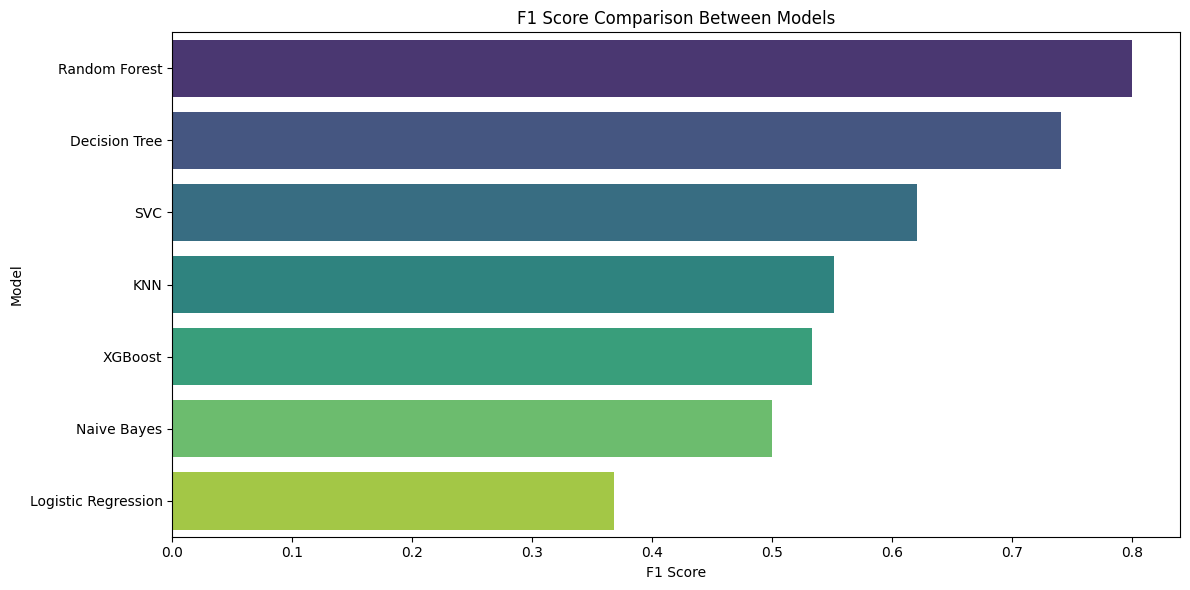

,Model,F1-Score
0,Random Forest,0.800000
1,Decision Tree,0.740741
2,SVC,0.620690
3,KNN,0.551724
4,XGBoost,0.533333
5,Naive Bayes,0.500000
6,Logistic Regression,0.368421


In [162]:
results_list = []

# Function to safely get F1-score for class 1
def get_f1_score_class_1(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    return report['1']['f1-score'] if '1' in report and report['1'] else 0.0

# Collect results for XGBoost
results_list.append({"Model": "XGBoost", "F1-Score": get_f1_score_class_1(y_test, best_model.predict(X_test_selected))})

# Collect results for KNN
results_list.append({"Model": "KNN", "F1-Score": get_f1_score_class_1(y_test, knn.predict(X_test_scaled))})

# Collect results for SVC
results_list.append({"Model": "SVC", "F1-Score": get_f1_score_class_1(y_test, svm.predict(X_test_scaled))})

# Collect results for Logistic Regression
results_list.append({"Model": "Logistic Regression", "F1-Score": get_f1_score_class_1(y_test, lr.predict(X_test_scaled))})

# Collect results for Naive Bayes
results_list.append({"Model": "Naive Bayes", "F1-Score": get_f1_score_class_1(y_test, nb.predict(X_test))})

# Collect results for Decision Tree
results_list.append({"Model": "Decision Tree", "F1-Score": get_f1_score_class_1(y_test, best_dt.predict(X_test_scaled))})

# Collect results for Random Forest
results_list.append({"Model": "Random Forest", "F1-Score": get_f1_score_class_1(y_test, best_rf.predict(X_test_scaled))})


results_df = pd.DataFrame(results_list).sort_values(by="F1-Score", ascending=False)
results_df.reset_index(drop=True, inplace=True)


# Plot F1 scores
plt.figure(figsize=(12, 6))
sns.barplot(x="F1-Score", y="Model", data=results_df, palette="viridis")
plt.title("F1 Score Comparison Between Models")
plt.xlabel("F1 Score")
plt.ylabel("Model")
plt.tight_layout()
plt.show()
# Display table
results_df